### Loading Dataset

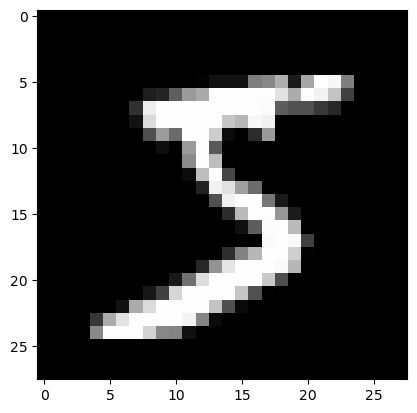

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# A function to plot images
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


# Reading The Train Set
train_images_file = open('train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))


# Reading The Test Set
test_images_file = open('t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))


# Plotting an image
show_image(train_set[0][0])
plt.show()

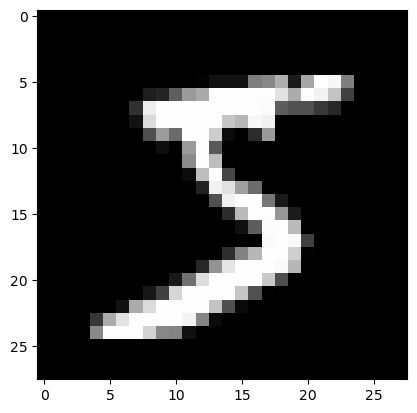

In [2]:
show_image(train_set[0][0])
plt.show()

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

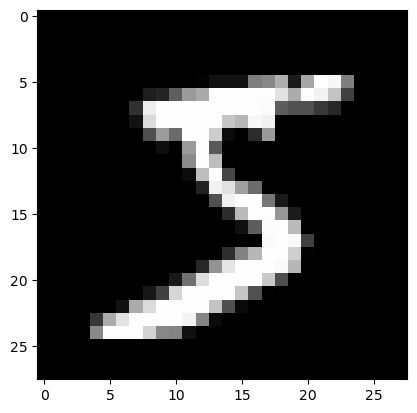

In [3]:
plt.imshow(train_set[0][0].reshape(28, -1), 'gray')
train_set[0][1]

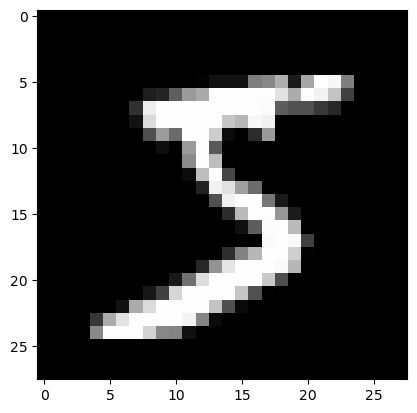

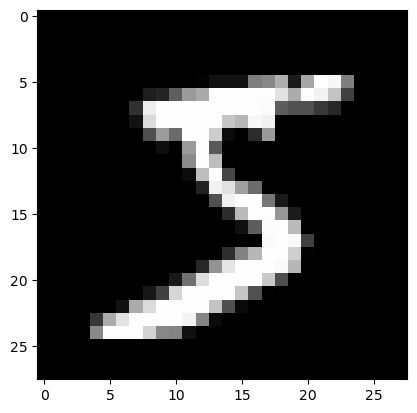

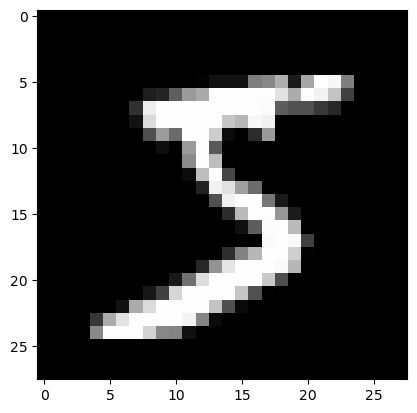

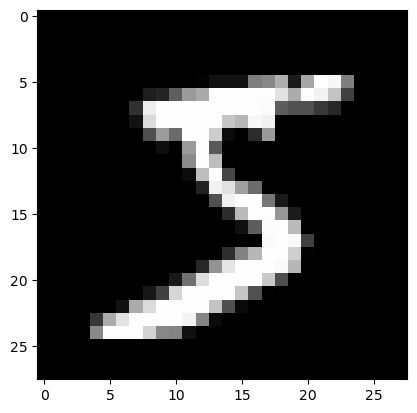

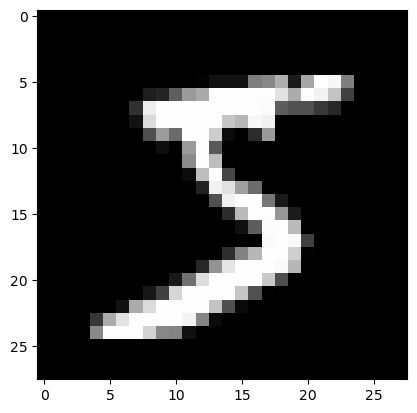

In [4]:
for i in range(0, 5):
    show_image(train_set[0][0])
    plt.show()
    

In [5]:
train_set[0][0].reshape(28, -1)
train_set[1][0]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

## Feed Forward
Formula:
$$
a^{(L+1)} = \sigma(W^{(L+1)}× a^{(L)} + b^{(L+1)})
$$

For understanding the formulas behind MLP more watch this video
https://www.youtube.com/watch?v=JKABHlqdmQU&list=PLhY5PYhspVfS7D2F0RRH7quUQe5GloYL8&index=4

W is weight matrix. Its size is k*n where k is num of neurons on the next layer and n is num of neurons on the current layer.

In [6]:
NUM_OF_PIXELS = 784 # (28*28=784 images pixels)

In [7]:
# initialize wrights 
# we have to normalize 
W1 = np.random.normal(size = (16, NUM_OF_PIXELS)) # input layer
W2 = np.random.normal(size=(16, 16)) # hidden layer
W3 = np.random.normal(size=(10, 16)) # output layer - 10 because we have 10 digits to predict on different pictures

# Initialize bias = 0, for each layer.
b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((10, 1))

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
train_set[1][0].shape

(784, 1)

In [10]:
NUM_OF_SAMPLES=100 # we seprate 100 of all to work with them (PDF said)

def feed_forward(W1, W2, W3, b1, b2, b3):
    count = 0
    
    for x in train_set[:NUM_OF_SAMPLES]:
        a0 = x[0]
        a1 = sigmoid (W1 @ a0 + b1)
        a2 = sigmoid (W2 @ a1 + b2)
        a3 = sigmoid (W3 @ a2 + b3)
    
        predicted_number = np.where(a3 == np.amax(a3))
        #print(f"{a3}     {np.amax(a3)}         {predicted_number}")
        real_number = np.where(x[1] == np.amax(x[1]))
        #print(f"{x[1]}     {np.amax(x[1])}         {real_number}")

        if predicted_number == real_number:
            count += 1

    print(f"Accuracy: {count / NUM_OF_SAMPLES}")



In [11]:
feed_forward(W1, W2, W3, b1, b2, b3)

Accuracy: 0.14


## Back propagation
The cost function is:
$$ Cost =\sum_{j=0}^{n_{L} - 1} (a_{j}^{(L)} - y_{j})^2 $$
We want to minimize this cost function which we do it with Gradient Descent. For more intformation watch these videos (which is in persian):
Gradient Descent and Cost Function:
https://www.youtube.com/watch?v=oCItXguIRLM&list=PLhY5PYhspVfS7D2F0RRH7quUQe5GloYL8&index=7
Back propagation:
https://www.youtube.com/watch?v=JKABHlqdmQU&list=PLhY5PYhspVfS7D2F0RRH7quUQe5GloYL8&index=3

These are screenshots of second video:

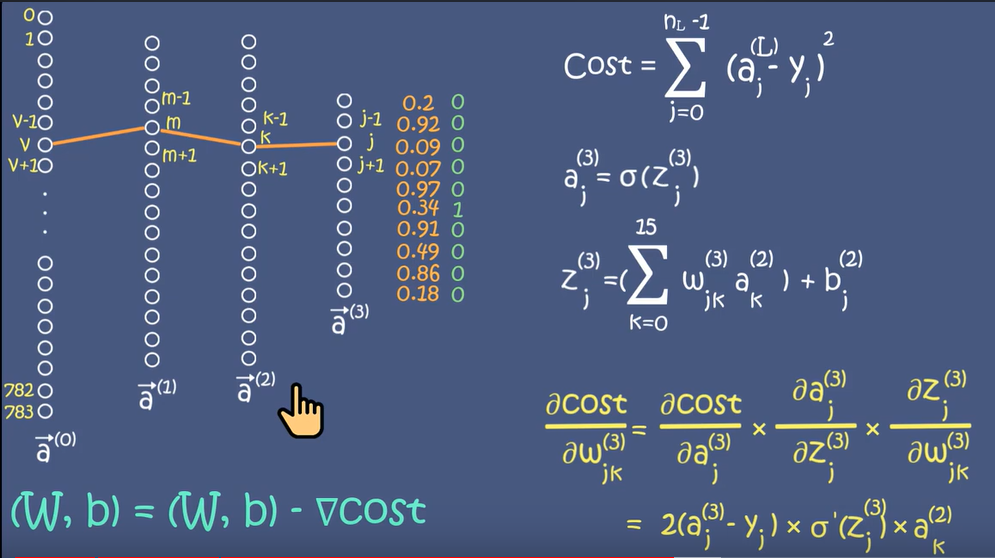

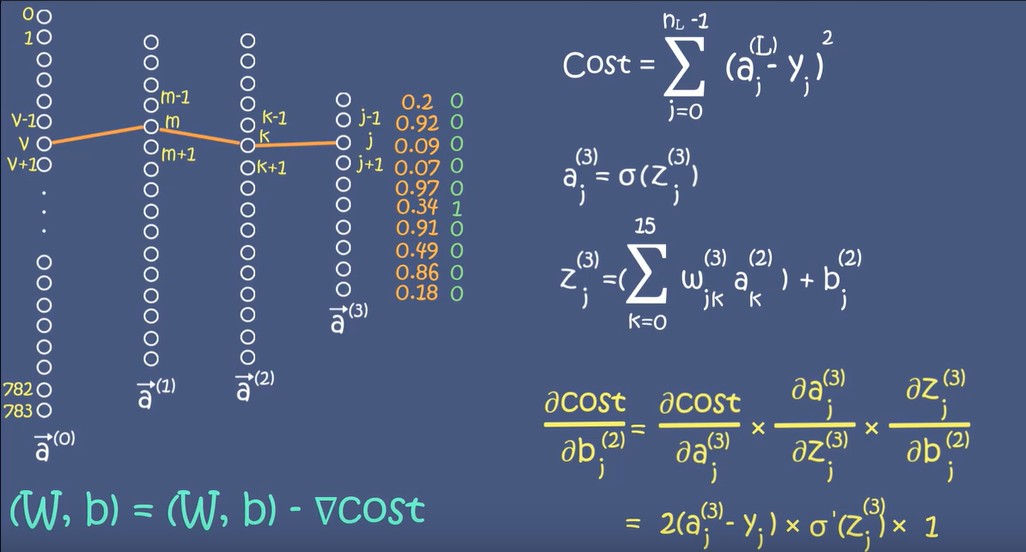

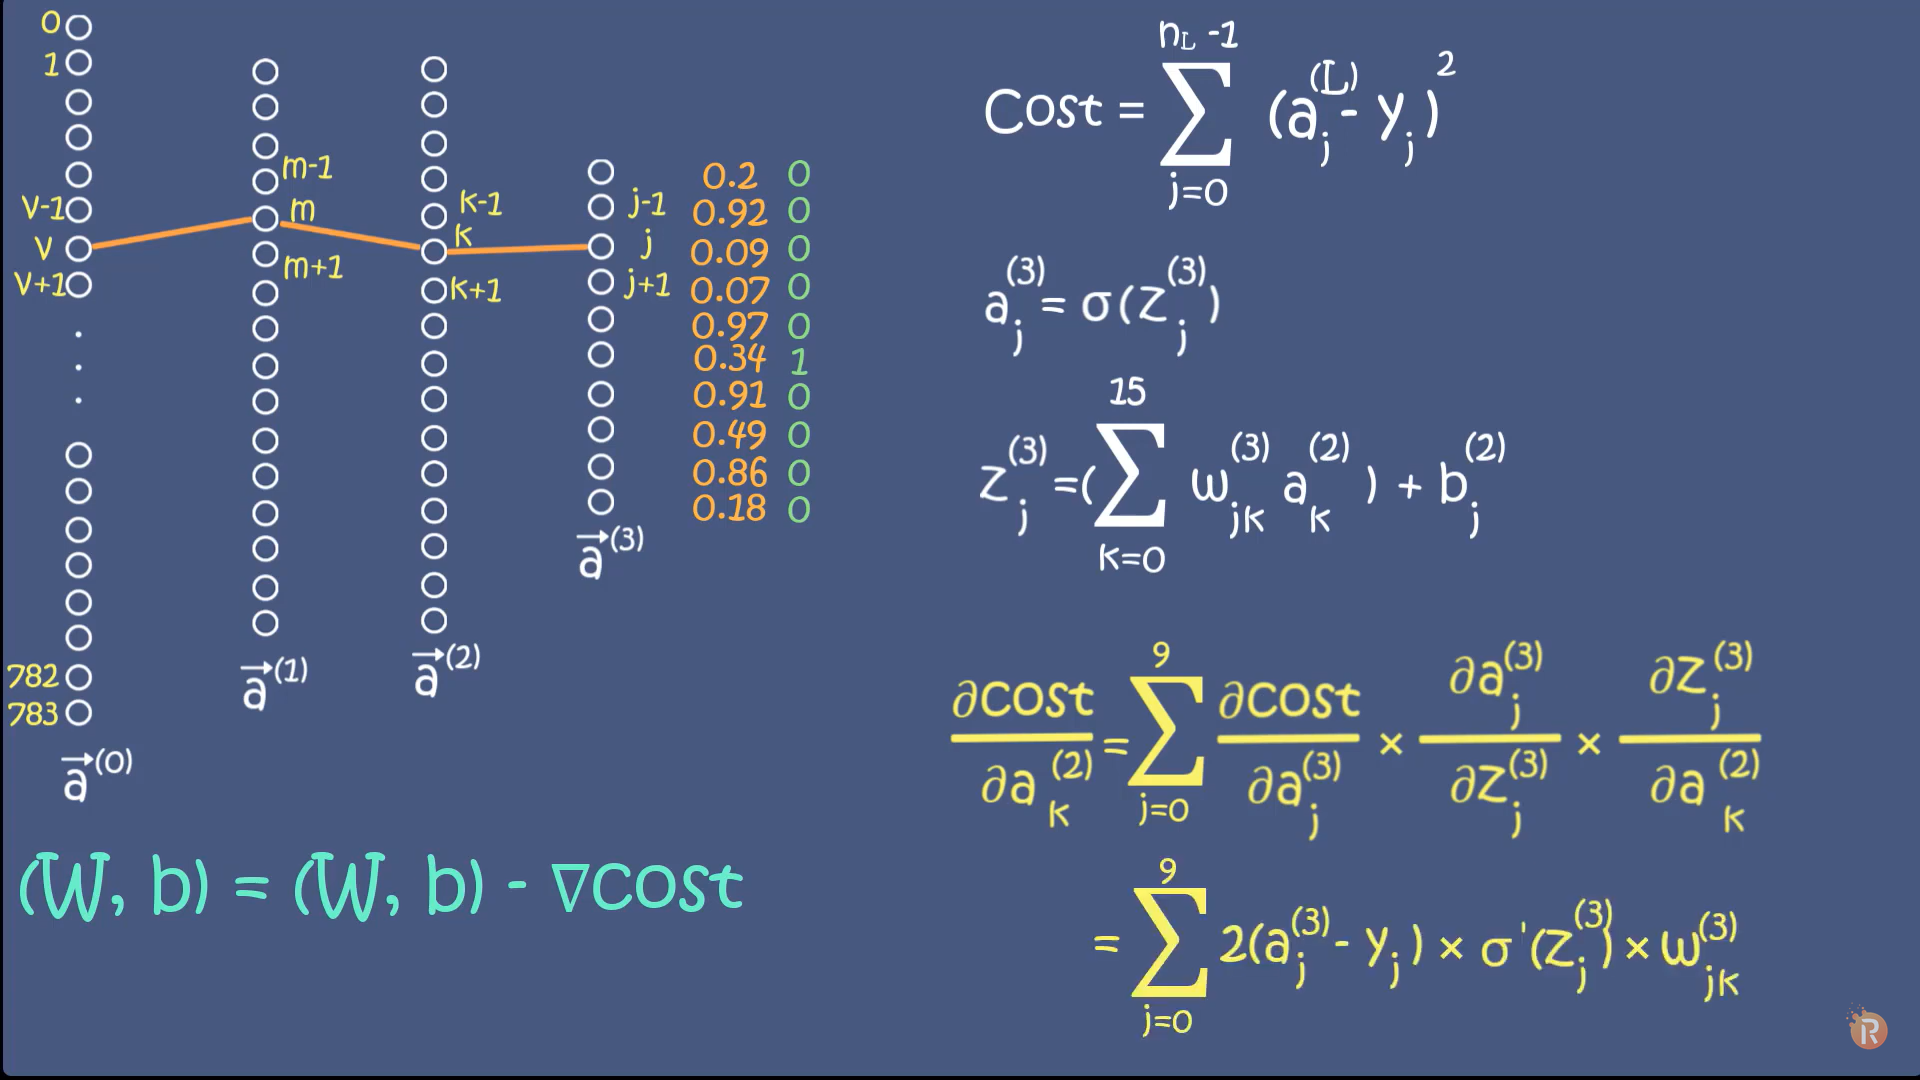

In [12]:
batch_size = 10
learning_rate = 1
epoch = 20

In [13]:
# Backpropagation

import time
costs = []
W1 = np.random.normal(size=(16, NUM_OF_PIXELS))
W2 = np.random.normal(size=(16, 16))
W3 = np.random.normal(size=(10, 16))

# Initialize b = 0, for each layer.
b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((10, 1))

start = time.time()  # because we want to compare execution time of this with vectorization algorithm
for i in range(epoch):
    np.random.shuffle(train_set)
    train = train_set[:NUM_OF_SAMPLES]
    batches = []
    for x in range(0, NUM_OF_SAMPLES, batch_size):
        batches.append(train[x: x + batch_size])
    for batch in batches:
        grad_W1 = np.zeros((16, NUM_OF_PIXELS))
        grad_W2 = np.zeros((16, 16))
        grad_W3 = np.zeros((10, 16))

        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((10, 1))

        for image, label in batch:
            a1 = sigmoid(W1 @ image + b1)
            a2 = sigmoid(W2 @ a1 + b2)
            a3 = sigmoid(W3 @ a2 + b3)

            # Last Layer
            # cost / weight3
            for j in range(grad_W3.shape[0]):
                for k in range(grad_W3.shape[1]):
                    grad_W3[j, k] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * a2[k, 0]

            ## cost / bias3
            for j in range(grad_b3.shape[0]):
                grad_b3[j, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0])

            # Third layer
            # cost / activation2
            delta_3 = np.zeros((16, 1))
            for k in range(16):
                for j in range(10):
                    delta_3[k, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * W3[j, k]

            # cost / weight2
            for k in range(grad_W2.shape[0]):
                for m in range(grad_W2.shape[1]):
                    grad_W2[k, m] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0]) * a1[m, 0]

            # cost / bias2
            for k in range(grad_b2.shape[0]):
                grad_b2[k, 0] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0])

            # Second layer
            # cost / activation1
            delta_2 = np.zeros((16, 1))
            for m in range(16):
                for k in range(16):
                    delta_2[m, 0] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0]) * W2[k, m]

            # cost / weight1
            for m in range(grad_W1.shape[0]):
                for v in range(grad_W1.shape[1]):
                    grad_W1[m, v] += delta_2[m, 0] * a1[m, 0] * (1 - a1[m, 0]) * image[v, 0]

            # cost / bias1
            for m in range(grad_b1.shape[0]):
                grad_b1[m, 0] += delta_2[m, 0] * a1[m, 0] * (1 - a1[m, 0])

        W3 = W3 - (learning_rate * (grad_W3 / batch_size))
        W2 = W2 - (learning_rate * (grad_W2 / batch_size))
        W1 = W1 - (learning_rate * (grad_W1 / batch_size))

        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))

    # calculate cost average per epoch
    cost = 0
    for train_data in train:
        a0 = train_data[0]
        a1 = sigmoid(W1 @ a0 + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        a3 = sigmoid(W3 @ a2 + b3)


        for j in range(10):
            ## based on formula
            cost += ((a3[j, 0] - train_data[1][j, 0]) ** 2)

    cost /= NUM_OF_SAMPLES
    costs.append(cost)

stop = time.time()



In [14]:
correct = 0
for train_data in train:
    a0 = train_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    if a3.argmax() == train_data[1].argmax():
          correct+= 1
        
print(f"Accuracy without vectorization - samples = 100 | epoch = 20: {correct / NUM_OF_SAMPLES}")

Accuracy without vectorization - samples = 100 | epoch = 20: 0.38


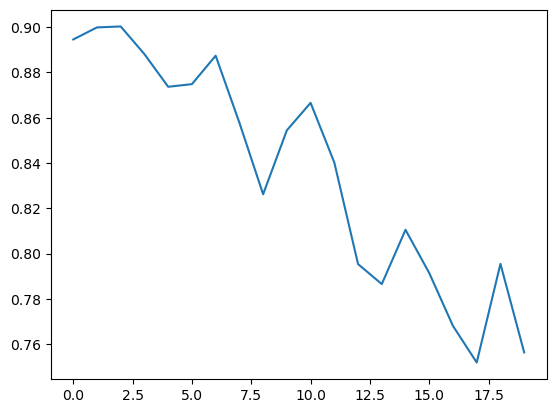

In [15]:
epochs = [i for i in range(epoch)]
plt.plot(epochs, costs)

In [16]:
print(f'Execution time: {stop-start}')

Execution time: 38.654752254486084


In [17]:
epoch = 30 # testing another epoch

In [18]:
import time

costs = []
W1 = np.random.normal(size=(16, NUM_OF_PIXELS))
W2 = np.random.normal(size=(16, 16))
W3 = np.random.normal(size=(10, 16))

# Initialize b = 0, for each layer.
b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((10, 1))

start = time.time()  # because we want to compare execution time of this with vectorization algorithm
for i in range(epoch):
    np.random.shuffle(train_set)
    train = train_set[:NUM_OF_SAMPLES]
    batches = []
    for x in range(0, NUM_OF_SAMPLES, batch_size):
        batches.append(train[x: x + batch_size])
    for batch in batches:
        grad_W1 = np.zeros((16, NUM_OF_PIXELS))
        grad_W2 = np.zeros((16, 16))
        grad_W3 = np.zeros((10, 16))

        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((10, 1))

        for image, label in batch:
            a1 = sigmoid(W1 @ image + b1)
            a2 = sigmoid(W2 @ a1 + b2)
            a3 = sigmoid(W3 @ a2 + b3)

            # Last Layer
            # cost / weight3
            for j in range(grad_W3.shape[0]):
                for k in range(grad_W3.shape[1]):
                    grad_W3[j, k] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * a2[k, 0]

            ## cost / bias3
            for j in range(grad_b3.shape[0]):
                grad_b3[j, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0])

            # Third layer
            # cost / activation2
            delta_3 = np.zeros((16, 1))
            for k in range(16):
                for j in range(10):
                    delta_3[k, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * W3[j, k]

            # cost / weight2
            for k in range(grad_W2.shape[0]):
                for m in range(grad_W2.shape[1]):
                    grad_W2[k, m] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0]) * a1[m, 0]

            # cost / bias2
            for k in range(grad_b2.shape[0]):
                grad_b2[k, 0] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0])

            # Second layer
            # cost / activation1
            delta_2 = np.zeros((16, 1))
            for m in range(16):
                for k in range(16):
                    delta_2[m, 0] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0]) * W2[k, m]

            # cost / weight1
            for m in range(grad_W1.shape[0]):
                for v in range(grad_W1.shape[1]):
                    grad_W1[m, v] += delta_2[m, 0] * a1[m, 0] * (1 - a1[m, 0]) * image[v, 0]

            # cost / bias1
            for m in range(grad_b1.shape[0]):
                grad_b1[m, 0] += delta_2[m, 0] * a1[m, 0] * (1 - a1[m, 0])

        W3 = W3 - (learning_rate * (grad_W3 / batch_size))
        W2 = W2 - (learning_rate * (grad_W2 / batch_size))
        W1 = W1 - (learning_rate * (grad_W1 / batch_size))

        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))

    # calculate cost average per epoch
    cost = 0
    for train_data in train:
        a0 = train_data[0]
        a1 = sigmoid(W1 @ a0 + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        a3 = sigmoid(W3 @ a2 + b3)


        for j in range(10):
            ## based on formula
            cost += ((a3[j, 0] - train_data[1][j, 0]) ** 2)

    cost /= NUM_OF_SAMPLES
    costs.append(cost)

stop = time.time()



In [19]:
correct = 0
for train_data in train_set[:NUM_OF_SAMPLES]:
    a0 = train_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    if a3.argmax() == train_data[1].argmax():
          correct+= 1
        
print(f"Accuracy without vectorization - samples = 100 | epoch = 30: {correct / NUM_OF_SAMPLES}")

Accuracy without vectorization - samples = 100 | epoch = 30: 0.4


Execution time: 58.762372970581055


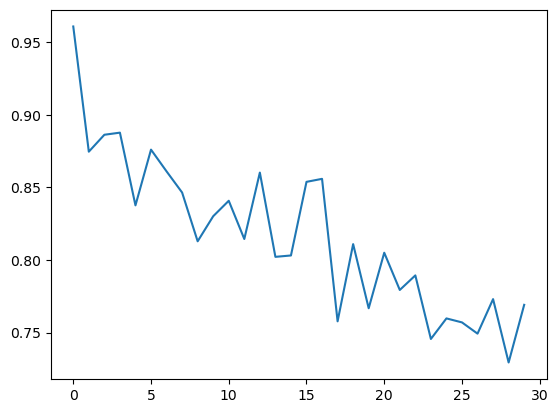

In [20]:
epochs = [i for i in range(epoch)]
plt.plot(epochs, costs)

print(f'Execution time: {stop-start}')

In [21]:
epoch = 20

## Vectorization
In the above code we used for loops but it is too slow and as we saw we just train 100 sample of data. For solving this problem we use Vectorization. By using The processing time will reduced and that's because matrix operations can run in parallel CPUs and also today's processors have instructions for working with large vector data and that would be more effective too.

In [22]:
W1 = np.random.normal(size = (16, NUM_OF_PIXELS))
W2 = np.random.normal(size = (16,16))
W3 = np.random.normal(size = (10, 16))

b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((10, 1))

costs = []

start = time.time()  # because we want to compare execution time of this with vectorization algorithm
        
for i in range(epoch):
    np.random.shuffle(train_set)

    train = train_set[:NUM_OF_SAMPLES]
    batches = []
    for x in range(0, NUM_OF_SAMPLES, batch_size):
        batches.append(train[x: x + batch_size])
        
    for batch in batches:
        grad_W1 = np.zeros((16, NUM_OF_PIXELS))
        grad_W2 = np.zeros((16, 16))
        grad_W3 = np.zeros((10, 16))

        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((10, 1))

        for image, label in batch:
            a1 = sigmoid(W1 @ image + b1)
            a2 = sigmoid(W2 @ a1 + b2)
            a3 = sigmoid(W3 @ a2 + b3)

            # Last Layer
            # cost / weight3
            grad_W3 += (2 * (a3 - label) * a3 * (1 - a3)) @ np.transpose(a2)
            
            ## cost / bias3
            grad_b3 += 2 * (a3 - label) * a3 * (1 - a3)

            # Third layer
            # cost / activation2
            delta_3 = np.zeros((16, 1))
            delta_3 += np.transpose(W3) @ (2 *(a3 - label) * (a3 * (1 - a3)))
            
            # cost / weight2
            grad_W2 += (a2 * (1 - a2) * delta_3) @ np.transpose(a1)

            # cost / bias2
            grad_b2 += delta_3 * a2 * (1 - a2)

            # Second layer
            # cost / activation1
            delta_2 = np.zeros((16, 1))
            delta_2 += np.transpose(W2) @ delta_3 * a2 * (1 - a2)

            # cost / weight1
            grad_W1 += (delta_2 * a1 * (1 - a1)) @ np.transpose(image)

            # cost / bias1
            grad_b1 += delta_2 * a1 * (1 - a1)

        W3 = W3 - (learning_rate * (grad_W3 / batch_size))
        W2 = W2 - (learning_rate * (grad_W2 / batch_size))
        W1 = W1 - (learning_rate * (grad_W1 / batch_size))

        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
    
    # calculate cost average per epoch
    cost = 0
    for train_data in  train:
        a0 = train_data[0]
        a1 = sigmoid(W1 @ a0 + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        a3 = sigmoid(W3 @ a2 + b3)


        for j in range(10):
            ## based on formula
            cost += ((a3[j, 0] - train_data[1][j, 0]) ** 2)

    cost /= NUM_OF_SAMPLES
    costs.append(cost)

stop = time.time()




In [23]:
correct = 0
for train_data in train:
    a0 = train_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    if a3.argmax() == train_data[1].argmax():
        correct+= 1
        
print(f"Accuracy with vectorization - samples = 100 | epoch = 20: {correct / NUM_OF_SAMPLES}")

Accuracy with vectorization - samples = 100 | epoch = 20: 0.45


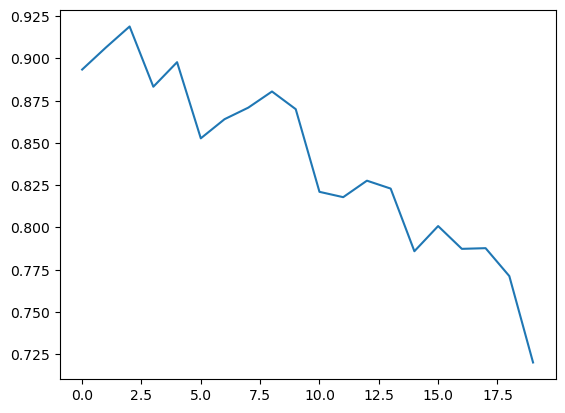

In [24]:
epochs = [i for i in range(epoch)]
plt.plot(epochs, costs)

In [25]:
print(f'Execution time: {stop-start}')

Execution time: 0.32404446601867676


In [26]:
epoch=200 # problem asked to change epoch to 200


In [27]:
W1 = np.random.normal(size = (16, NUM_OF_PIXELS))
W2 = np.random.normal(size = (16,16))
W3 = np.random.normal(size = (10, 16))

b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((10, 1))


costs = []

start = time.time()  # because we want to compare execution time of this with vectorization algorithm
        
for i in range(epoch):
    np.random.shuffle(train_set)

    train = train_set[:NUM_OF_SAMPLES]
    batches = []
    for x in range(0, NUM_OF_SAMPLES, batch_size):
        batches.append(train[x: x + batch_size])
        
    for batch in batches:
        grad_W1 = np.zeros((16, NUM_OF_PIXELS))
        grad_W2 = np.zeros((16, 16))
        grad_W3 = np.zeros((10, 16))

        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((10, 1))

        for image, label in batch:
            a1 = sigmoid(W1 @ image + b1)
            a2 = sigmoid(W2 @ a1 + b2)
            a3 = sigmoid(W3 @ a2 + b3)

            # Last Layer
            # cost / weight3
            grad_W3 += (2 * (a3 - label) * a3 * (1 - a3)) @ np.transpose(a2)
            
            ## cost / bias3
            grad_b3 += 2 * (a3 - label) * a3 * (1 - a3)

            # Third layer
            # cost / activation2
            delta_3 = np.zeros((16, 1))
            delta_3 += np.transpose(W3) @ (2 *(a3 - label) * (a3 * (1 - a3)))
            
            # cost / weight2
            grad_W2 += (a2 * (1 - a2) * delta_3) @ np.transpose(a1)

            # cost / bias2
            grad_b2 += delta_3 * a2 * (1 - a2)

            # Second layer
            # cost / activation1
            delta_2 = np.zeros((16, 1))
            delta_2 += np.transpose(W2) @ delta_3 * a2 * (1 - a2)

            # cost / weight1
            grad_W1 += (delta_2 * a1 * (1 - a1)) @ np.transpose(image)

            # cost / bias1
            grad_b1 += delta_2 * a1 * (1 - a1)

        W3 = W3 - (learning_rate * (grad_W3 / batch_size))
        W2 = W2 - (learning_rate * (grad_W2 / batch_size))
        W1 = W1 - (learning_rate * (grad_W1 / batch_size))

        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
    
    # calculate cost average per epoch
    cost = 0
    for train_data in  train:
        a0 = train_data[0]
        a1 = sigmoid(W1 @ a0 + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        a3 = sigmoid(W3 @ a2 + b3)


        for j in range(10):
            ## based on formula
            cost += ((a3[j, 0] - train_data[1][j, 0]) ** 2)

    cost /= NUM_OF_SAMPLES
    costs.append(cost)

stop = time.time()




In [28]:
correct = 0
for train_data in train:
    a0 = train_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    if a3.argmax() == train_data[1].argmax():
        correct+= 1
        
print(f"Accuracy without vectorization - samples = 100 | epoch = 200: {correct / NUM_OF_SAMPLES}")

Accuracy without vectorization - samples = 100 | epoch = 200: 0.89


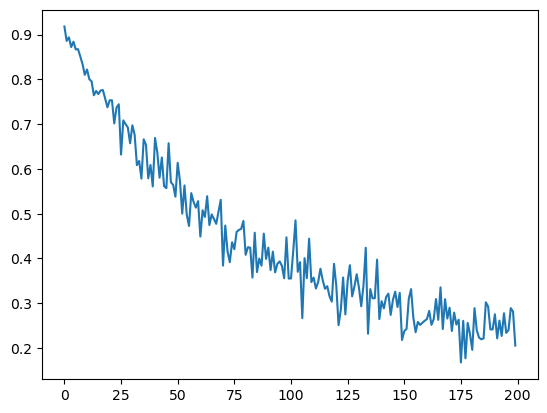

In [29]:
epochs = [i for i in range(epoch)]
plt.plot(epochs, costs)

In [30]:
print(f'Execution time: {stop-start}')

Execution time: 3.231027603149414


### Testing the Model

In [31]:
batch_size = 50
learning_rate = 1
epoch = 5
NUM_OF_SAMPLES = 60000
NUM_OF_TEST_DATA = 10000


In [32]:
W1 = np.random.normal(size = (16, NUM_OF_PIXELS))
W2 = np.random.normal(size = (16,16))
W3 = np.random.normal(size = (10, 16))

b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((10, 1))


costs = []

start = time.time()  # because we want to compare execution time of this with vectorization algorithm
        
for i in range(epoch):
    np.random.shuffle(train_set)

    train = train_set[:NUM_OF_SAMPLES]
    batches = []
    for x in range(0, NUM_OF_SAMPLES, batch_size):
        batches.append(train[x: x + batch_size])
        
    for batch in batches:
        grad_W1 = np.zeros((16, NUM_OF_PIXELS))
        grad_W2 = np.zeros((16, 16))
        grad_W3 = np.zeros((10, 16))

        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((10, 1))

        for image, label in batch:
            a1 = sigmoid(W1 @ image + b1)
            a2 = sigmoid(W2 @ a1 + b2)
            a3 = sigmoid(W3 @ a2 + b3)

            # Last Layer
            # cost / weight3
            grad_W3 += (2 * (a3 - label) * a3 * (1 - a3)) @ np.transpose(a2)
            
            ## cost / bias3
            grad_b3 += 2 * (a3 - label) * a3 * (1 - a3)

            # Third layer
            # cost / activation2
            delta_3 = np.zeros((16, 1))
            delta_3 += np.transpose(W3) @ (2 *(a3 - label) * (a3 * (1 - a3)))
            
            # cost / weight2
            grad_W2 += (a2 * (1 - a2) * delta_3) @ np.transpose(a1)

            # cost / bias2
            grad_b2 += delta_3 * a2 * (1 - a2)

            # Second layer
            # cost / activation1
            delta_2 = np.zeros((16, 1))
            delta_2 += np.transpose(W2) @ delta_3 * a2 * (1 - a2)

            # cost / weight1
            grad_W1 += (delta_2 * a1 * (1 - a1)) @ np.transpose(image)

            # cost / bias1
            grad_b1 += delta_2 * a1 * (1 - a1)

        W3 = W3 - (learning_rate * (grad_W3 / batch_size))
        W2 = W2 - (learning_rate * (grad_W2 / batch_size))
        W1 = W1 - (learning_rate * (grad_W1 / batch_size))

        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
    
    # calculate cost average per epoch
    cost = 0
    for train_data in  train:
        a0 = train_data[0]
        a1 = sigmoid(W1 @ a0 + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        a3 = sigmoid(W3 @ a2 + b3)


        for j in range(10):
            ## based on formula
            cost += ((a3[j, 0] - train_data[1][j, 0]) ** 2)

    cost /= NUM_OF_SAMPLES
    costs.append(cost)

stop = time.time()




In [33]:
correct = 0
for train_data in train_set:
    a0 = train_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    if a3.argmax() == train_data[1].argmax():
        correct+= 1
        
print(f"Train_set Accuracy with vectorization - samples = ALL | epoch = 5 | batchsize = 50: {correct / NUM_OF_SAMPLES}")


correct = 0
for test_data in test_set:
    a0 = test_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    if a3.argmax() == test_data[1].argmax():
        correct+= 1
        
print(f"Test_set Accuracy with vectorization - samples = ALL | epoch = 5 | batchsize = 50: {correct / NUM_OF_TEST_DATA}")

Train_set Accuracy with vectorization - samples = ALL | epoch = 5 | batchsize = 50: 0.89145
Test_set Accuracy with vectorization - samples = ALL | epoch = 5 | batchsize = 50: 0.8933


Execution time: 35.79459190368652


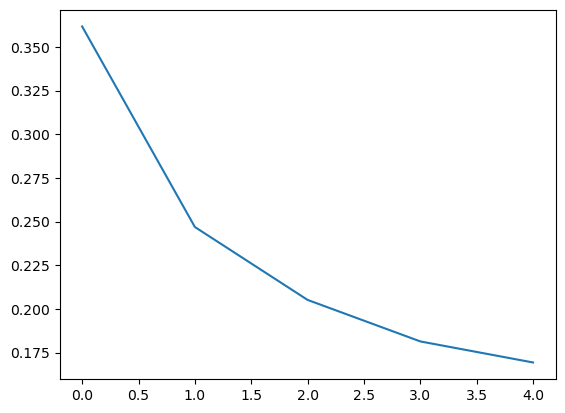

In [35]:
epochs = [i for i in range(epoch)]
plt.plot(epochs, costs)

print(f'Execution time: {stop-start}')